<a href="https://colab.research.google.com/github/KarenSaraiMoralesMontiel/Practica5_Estadistica/blob/main/Practica5_Estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica5_Estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

----

<h1><center>Monte Carlo</center></h1>
    
    
El algoritmo se basa en el muestreo aleatorio repetido en un intento de determinar la probabilidad. Esto significa simular un evento con entradas aleatorias un gran número de veces para obtener su estimación.
    
Las simulaciones Monte Carlo se pueden utilizar en una amplia gama de campos que van desde la economía, el juego, la ingeniería, la energía y cualquier otro campo intermedio. Por lo tanto, no importa en qué campo profesional se encuentre, es algo excelente que debe conocer.

---

Al aprender a construir simulaciones Monte Carlo, es mejor comenzar con un modelo básico para comprender los fundamentos. La forma más fácil y común de hacerlo es con juegos simples, por lo que utilizaremos un juego de dados en este caso.

Probablemente haya escuchado el dicho, "la casa siempre gana", así que para este ejemplo, la casa (típicamente un casino) tendrá una ventaja, y mostraremos lo que eso significa para las posibles ganancias del jugador.



## El juego de dados

Nuestro juego simple involucrará dos dados de seis caras. P

ara ganar, el jugador debe sacar el mismo número en ambos dados.

Un dado de seis caras tiene seis resultados posibles (1, 2, 3, 4, 5 y 6). Con dos dados, ahora hay 36 resultados posibles (1 y 1, 1 y 2, 1 y 3, etc., o 6 x 6 = 36 posibilidades).

En este juego, la casa tiene más oportunidades de ganar (30 resultados frente a los 6 resultados del jugador), lo que significa que la casa tiene bastante ventaja.

---

Digamos que nuestro jugador comienza con un saldo de 1,000 y está preparado para perderlo todo, por lo que apuesta 1 en cada tirada (lo que significa que se tiran ambos dados) y decide jugar 1,000 tiradas. Debido a que la casa es tan generosa, ofrecen pagar 4 veces la apuesta del jugador cuando el jugador gana.

Por ejemplo, si el jugador gana la primera tirada, su saldo aumenta en $4 y finaliza la ronda con un saldo de 1,004. Si milagrosamente lograban una racha de 1000 victorias, podrían irse a casa con 5000. Si perdía todas las rondas, podrían irse a casa sin nada. No es una mala relación riesgo-recompensa… o tal vez lo sea.

In [1]:
# Importando paqueterias
import matplotlib.pyplot as plt
import random

Ahora, debemos definir nuestra función que genere valores entre 1 y 6 para ambos dados. Podemos auxiliarnos con la funcion *random.randinit()*

Tomando en consideración la condición de que si el dado 1 es identico al dado 2, tendremos un resultado positivo en la apuesta, caso contrario, tendremos una derrota.

In [2]:
# Creando funcion de lanzamiento de dados
def roll_dice():
    d1 = random.randint(1,6)
    d2 = random.randint(1,6)
    return d1 == d2

Cada simulación Monte Carlo requerirá que sepa cuáles son sus entradas y qué información está buscando obtener.

En esta práctica, ya definimos cuáles son nuestras entradas cuando describimos el juego. **Dijimos que nuestra cantidad de tiradas por juego es 1,000, y la cantidad que el jugador apostará en cada tirada es $1**.

Además de nuestras variables de entrada, necesitamos definir cuántas veces queremos simular el juego. Podemos usar la variable num_simulations como nuestro conteo de simulación de Monte Carlo. Cuanto más alto hagamos este número, más precisa será la probabilidad predicha de su valor real.

La cantidad de variables que podemos rastrear generalmente aumenta con la complejidad de un proyecto, por lo que es importante precisar sobre qué información deseamos trabajar.

Para este caso, realizaremos un seguimiento de la probabilidad de ganar (ganancias por juego divididas por el número total de tiradas) y el saldo final para cada simulación (o juego). Estos se inicializan como listas y se actualizarán al final de cada juego.

In [3]:
# Entradas
num_simulations = 10000 #Valor dado
max_num_rolls = 1000#<COMPLETA>
bet = 1 #<COMPLETA>

# Seguimiento
win_probability = []
end_balance = []


### Configuración de la figura

El siguiente paso es configurar nuestra figura antes de ejecutar la simulación. Al hacer esto antes de la simulación, nos permite agregar líneas a nuestra figura después de cada juego. Luego, una vez que hayamos ejecutado todas las simulaciones, podemos mostrar la gráfica para mostrar nuestros resultados.

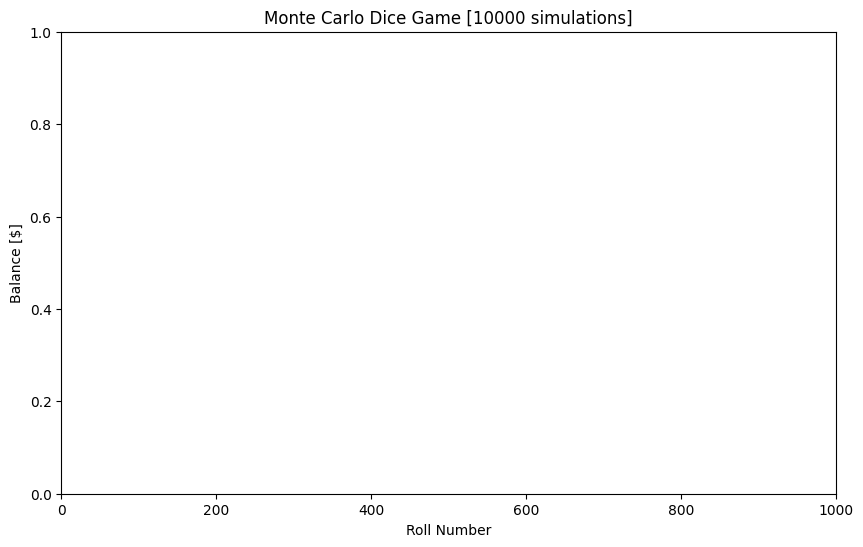

In [4]:
# Creando figura para los ejemplos de simulacion
# Creando figura para los ejemplos de simulacion
fig = plt.figure(figsize=(10,6))
plt.xlabel("Roll Number")
plt.ylabel("Balance [$]")
plt.title("Monte Carlo Dice Game [10000 simulations]")
plt.xlim(0,max_num_rolls)
plt.savefig("monte_carlo_dice_game.png", dpi=300)

En el siguiente código, tenemos un bucle for externo que itera a través de nuestro número predefinido de simulaciones (10 000 simulaciones) y un bucle while anidado que ejecuta cada juego (1000 tiradas).

Antes de comenzar cada ciclo while, inicializamos el saldo del jugador como $1,000 (como una lista para fines de trazado) y un conteo de tiradas y ganancias.

    * Nuestro bucle while simulará el juego durante 1000 tiradas. Dentro de este bucle, lanzamos los dados y usamos la variable booleana devuelta por roll_dice() para determinar el resultado. Si los dados son del mismo número, agregamos 4 veces la apuesta a la lista de saldo y agregamos una ganancia al conteo de ganancias. Si los dados son diferentes, restamos la apuesta de la lista de saldo. Al final de cada lanzamiento, agregamos un conteo a nuestra lista num_rolls.

Una vez que el número de lanzamientos llega a 1000, podemos calcular la probabilidad de ganar del jugador como el número de ganancias dividido por el número total de lanzamientos.

También podemos almacenar el saldo final del juego completo en la variable de seguimiento end_balance. Finalmente, podemos trazar las variables num_rolls y balance para agregar una línea a la figura que definimos anteriormente.

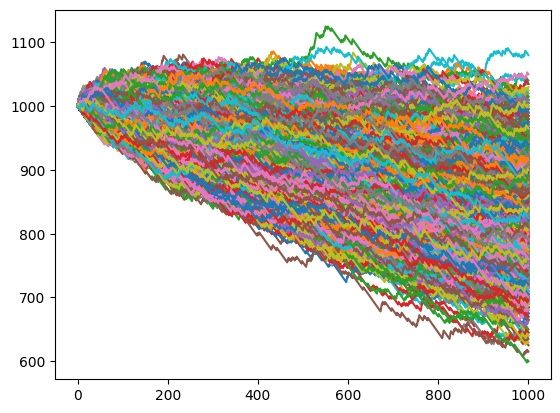

In [5]:
for _ in range(num_simulations):
    balance = [1000]
    num_rolls = [0]
    num_wins = 0

    while num_rolls[-1] < max_num_rolls:
        if roll_dice():
            balance.append(balance[-1] + bet * 4)
            num_wins += 1
        else:
            balance.append(balance[-1] - bet)  # Assuming each roll costs $5

        num_rolls.append(num_rolls[-1] + 1)

    win_probability.append(num_wins / max_num_rolls)
    end_balance.append(balance[-1])
    plt.plot(num_rolls, balance)
plt.show()

In [6]:
# Probabilidad promedio de victoria y saldo final
overall_win_probability =sum(win_probability)/len(win_probability)
overall_end_balance = sum(end_balance)/len(end_balance)
print("Promedio de victorias despues de " + str(num_simulations) + " simulaciones: " + str(overall_win_probability))
print("Saldo promedio despues de " + str(num_simulations) + " simulaciones: $" + str(overall_end_balance))

Promedio de victorias despues de 10000 simulaciones: 0.16659969999999996
Saldo promedio despues de 10000 simulaciones: $832.9985


## Desafio complementario

Ahora, realiza el mismo procedimiento pero mostrando los
resultados para 10, 100, 1000 y 10000 lanzamientos, considerando 200, 2000 y 20000 simulaciones.

Como bien sabemos, cada que gana el individuo, la casa le pagaba 4 veces el valor de la apuesta.
Ahora, si gana, le pagaran 6 veces mas de lo apostado, siempre y cuando el individuo apueste de 3 en 3.

El monto inicial sería ahora de 800. ¿Cuánta diferencia existe entre los resultados obtenidos para cada escenario?
¿En cuales se tiene un porcentaje mayor de victoria?

Grafica estos resultados utilizando graficas de pastel y de barras y realiza una comparación entre ellos.

In [7]:
num_simulations_ls = [200,2000,20000] #Valor dado
max_num_rolls_ls = [10,100,1000,10000]#<COMPLETA>
data_pair = []
for num_roll in (max_num_rolls_ls):
  for simulation in (num_simulations_ls):
    data_pair.append((simulation, num_roll))

bet = 3 #<COMPLETA>
starting_balance = 800

# Seguimiento
win_probability = []
end_balance = []

In [8]:
data_pair

[(200, 10),
 (2000, 10),
 (20000, 10),
 (200, 100),
 (2000, 100),
 (20000, 100),
 (200, 1000),
 (2000, 1000),
 (20000, 1000),
 (200, 10000),
 (2000, 10000),
 (20000, 10000)]

In [9]:
def prepare_graph(max_num_rolls):
  fig = plt.figure(figsize=(10,6))
  plt.xlabel("Roll Number")
  plt.ylabel("Balance [$]")
  plt.title("Monte Carlo Dice Game [10000 simulations]")
  plt.xlim(0,max_num_rolls)

In [10]:
data_pair

[(200, 10),
 (2000, 10),
 (20000, 10),
 (200, 100),
 (2000, 100),
 (20000, 100),
 (200, 1000),
 (2000, 1000),
 (20000, 1000),
 (200, 10000),
 (2000, 10000),
 (20000, 10000)]

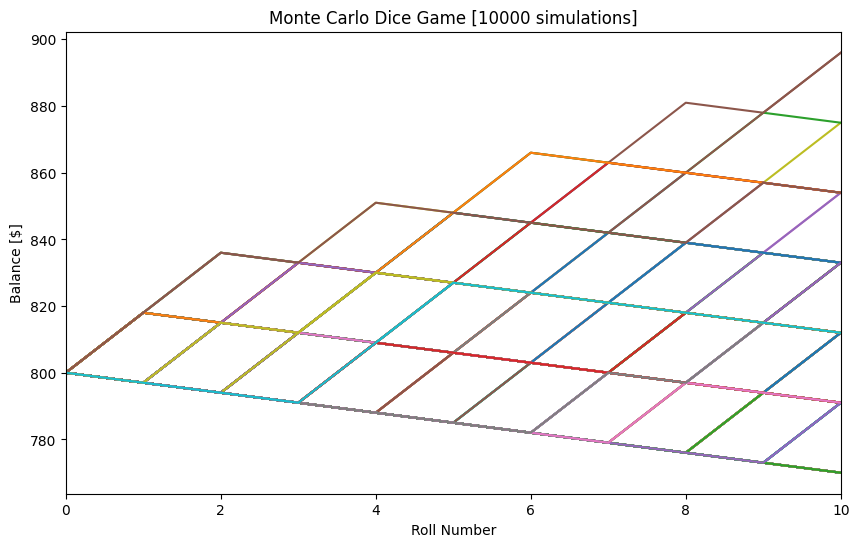

Promedio de victorias despues de 200 simulaciones: 0.1615000000000001
Saldo promedio despues de 200 simulaciones: $803.915


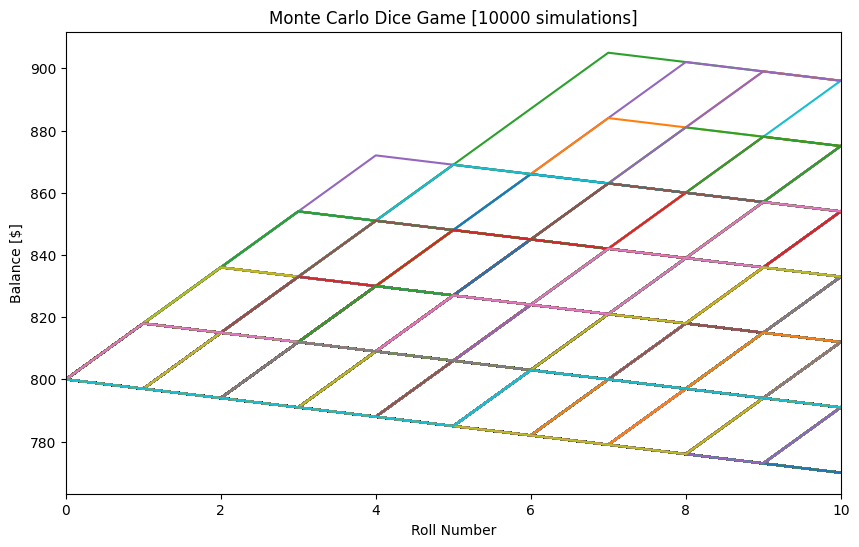

Promedio de victorias despues de 2000 simulaciones: 0.1625999999999999
Saldo promedio despues de 2000 simulaciones: $804.146


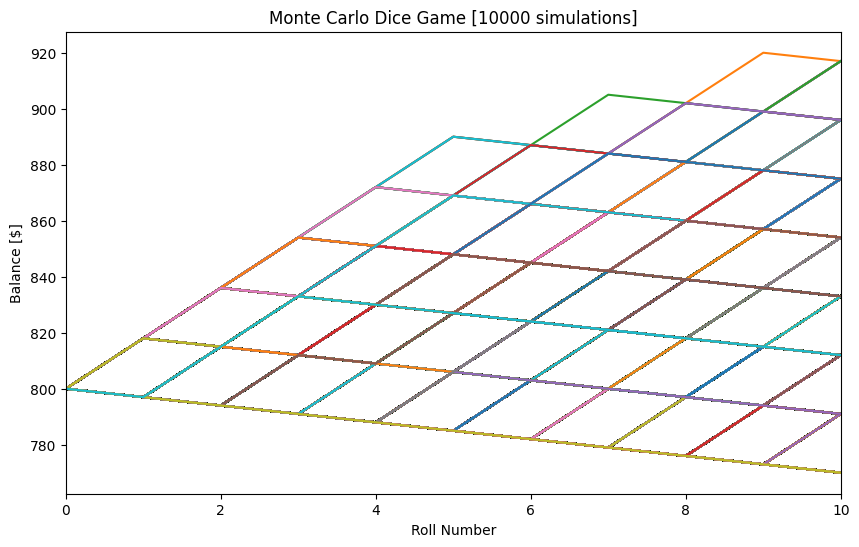

Promedio de victorias despues de 20000 simulaciones: 0.16543999999997744
Saldo promedio despues de 20000 simulaciones: $804.7424


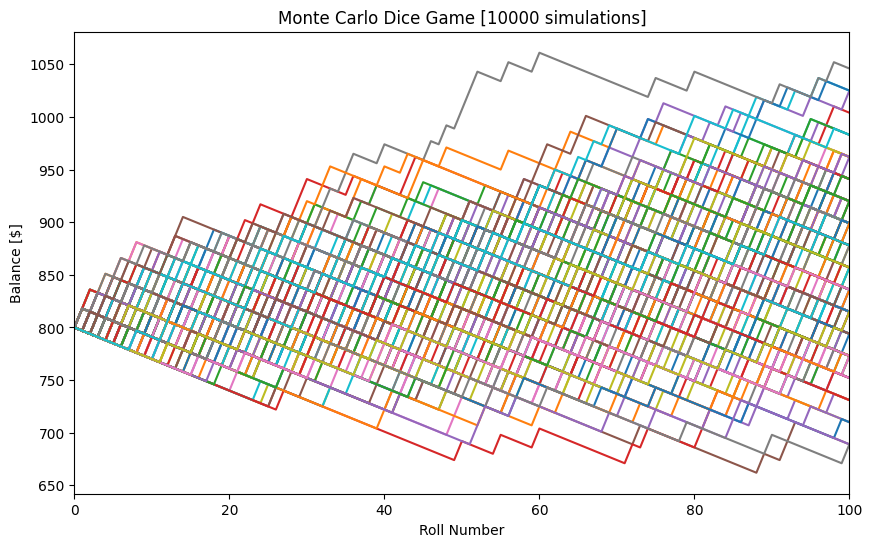

Promedio de victorias despues de 200 simulaciones: 0.16834999999999997
Saldo promedio despues de 200 simulaciones: $853.535


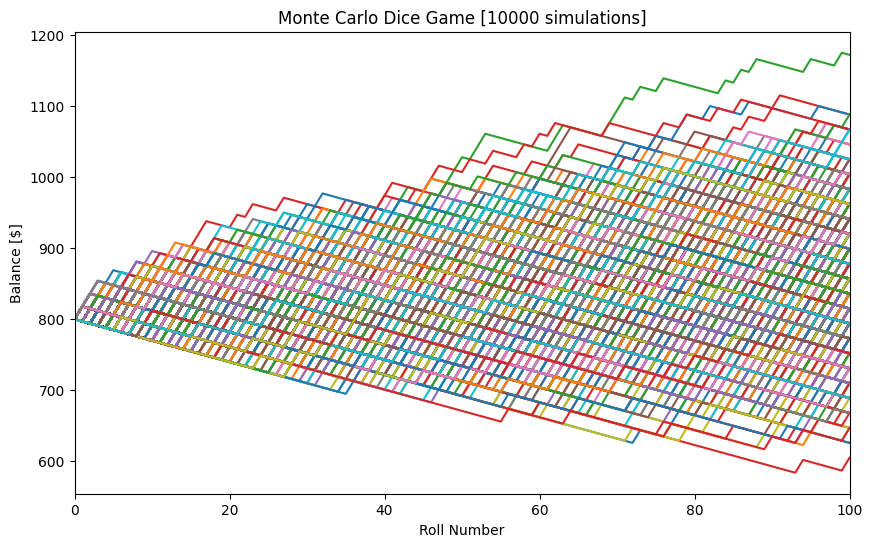

Promedio de victorias despues de 2000 simulaciones: 0.16609499999999994
Saldo promedio despues de 2000 simulaciones: $848.7995


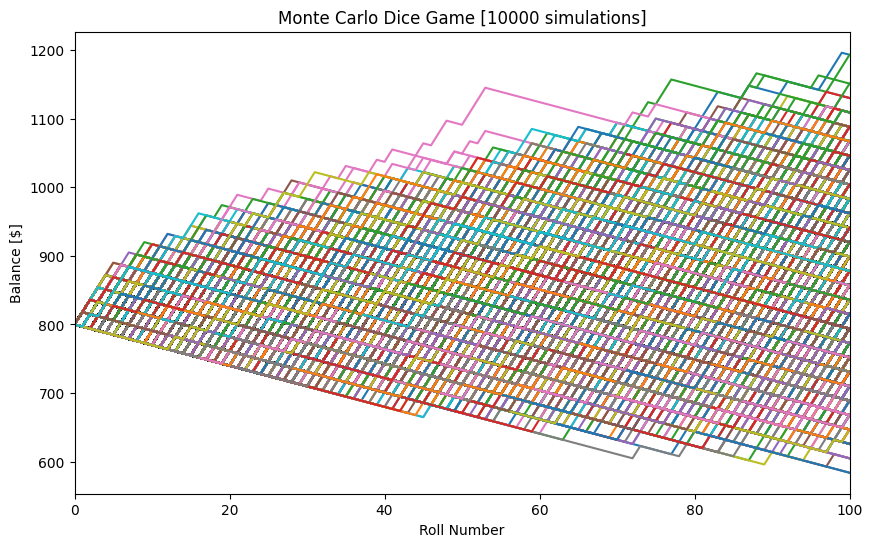

Promedio de victorias despues de 20000 simulaciones: 0.16662250000000023
Saldo promedio despues de 20000 simulaciones: $849.90725


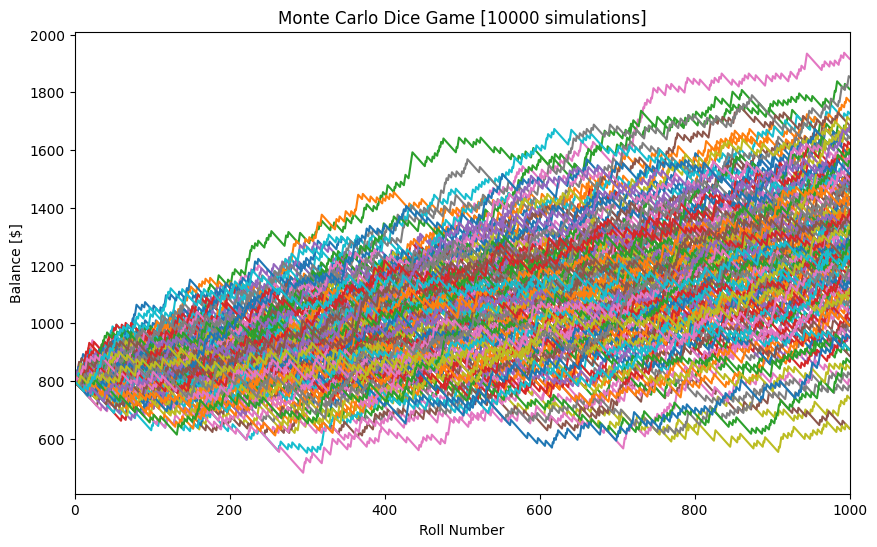

Promedio de victorias despues de 200 simulaciones: 0.16612999999999997
Saldo promedio despues de 200 simulaciones: $1288.73


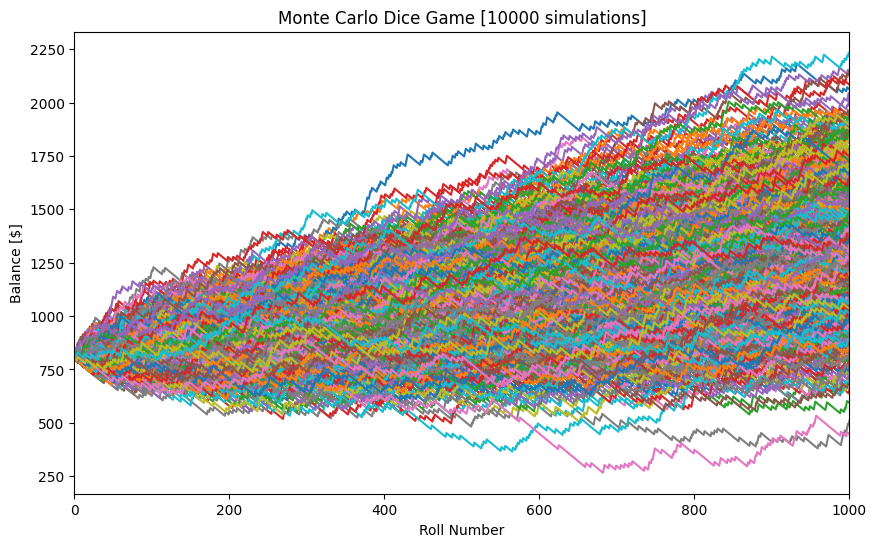

Promedio de victorias despues de 2000 simulaciones: 0.16681449999999992
Saldo promedio despues de 2000 simulaciones: $1303.1045


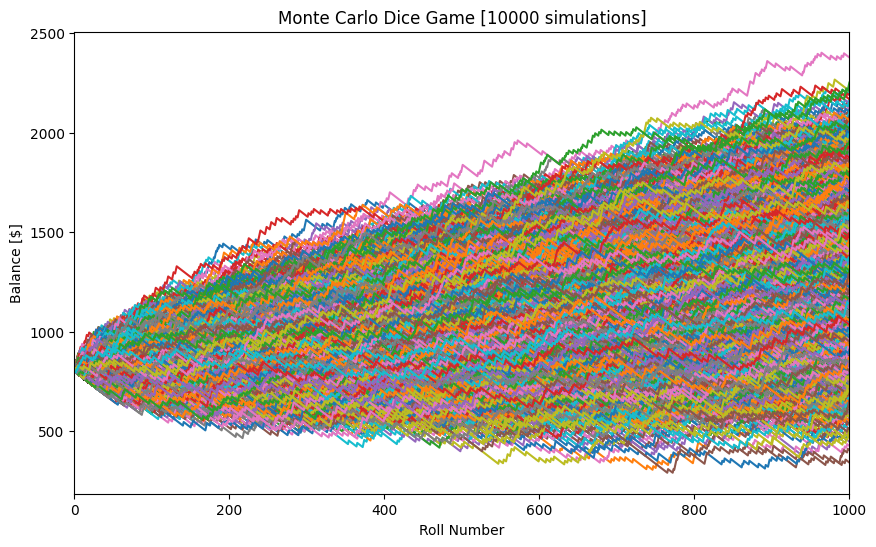

Promedio de victorias despues de 20000 simulaciones: 0.1665462999999987
Saldo promedio despues de 20000 simulaciones: $1297.4723


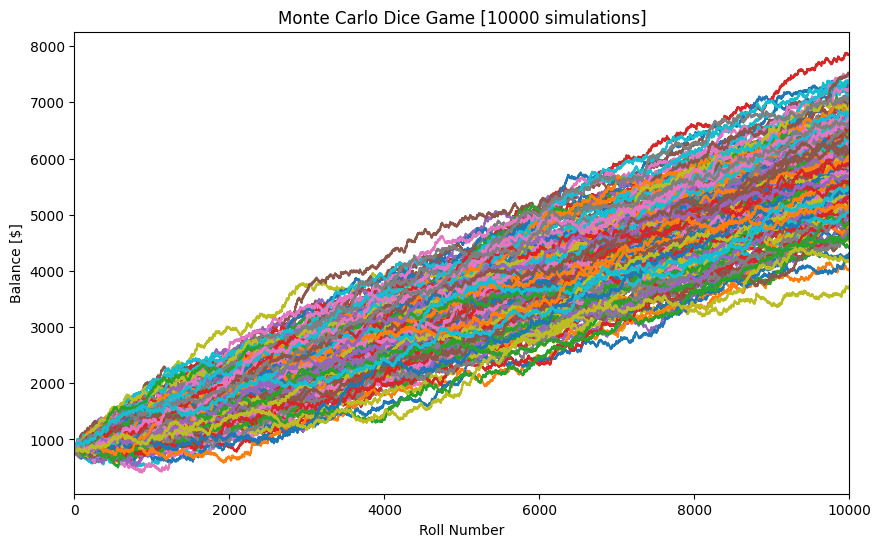

Promedio de victorias despues de 200 simulaciones: 0.16718799999999998
Saldo promedio despues de 200 simulaciones: $5909.48


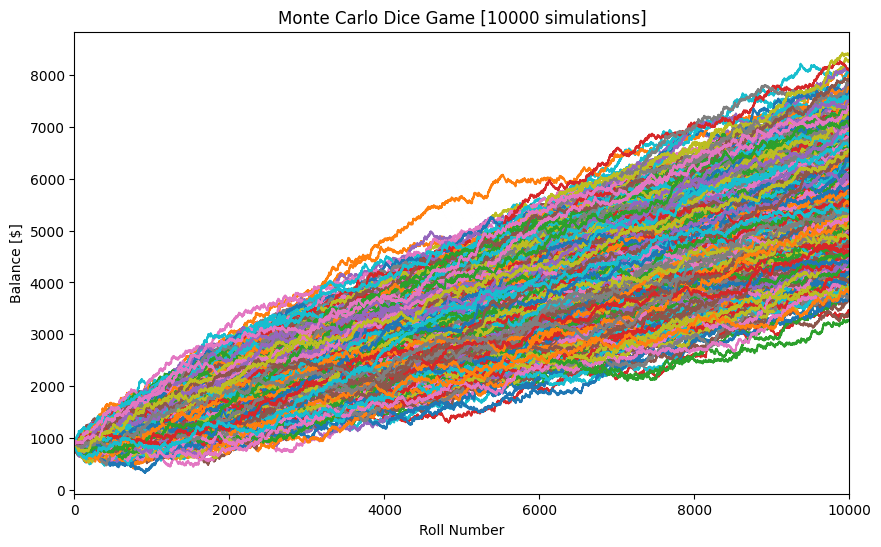

Promedio de victorias despues de 2000 simulaciones: 0.16654544999999985
Saldo promedio despues de 2000 simulaciones: $5774.5445


KeyboardInterrupt: 

In [ ]:
for pair in data_pair:
  num_simulations = pair[0]
  max_num_rolls = pair[1]
  win_probability = []
  end_balance = []

  prepare_graph(max_num_rolls)
  for _ in range(num_simulations):
    balance = [800]
    num_rolls = [0]
    num_wins = 0

    while num_rolls[-1] < max_num_rolls:
        if roll_dice():
            balance.append(balance[-1] + bet * 6)
            num_wins += 1
        else:
            balance.append(balance[-1] - bet)  # Assuming each roll costs $5

        num_rolls.append(num_rolls[-1] + 1)

    win_probability.append(num_wins / max_num_rolls)
    end_balance.append(balance[-1])
    plt.plot(num_rolls, balance)
  plt.show()
  overall_win_probability =sum(win_probability)/len(win_probability)
  overall_end_balance = sum(end_balance)/len(end_balance)
  print("Promedio de victorias despues de " + str(num_simulations) + " simulaciones: " + str(overall_win_probability))
  print("Saldo promedio despues de " + str(num_simulations) + " simulaciones: $" + str(overall_end_balance))

## ¿Qué es web scrapping?

Es una técnica para recuperar grandes cantidades de datos de Internet.

-----

Existen diferentes técnicas como Scrappy, BeautifulSoup, etc. La librería más común es BeautifulSoup.

Extrae la página Html de cualquier sitio web. Los datos almacenados por web Scrapping son un formato no estructurado. Convertimos los datos no estructurados en estructurados para el análisis y la exploración de datos.

------

### Bibliotecas utilizadas para Web Scraping

Como sabemos, Python se usa para varias aplicaciones y existen diferentes bibliotecas para diferentes propósitos. En nuestra demostración adicional, usaremos las siguientes bibliotecas:

   * BeautifulSoup: Beautiful Soup es un paquete de Python para analizar documentos HTML y XML. Crea árboles de análisis que son útiles para extraer los datos fácilmente.
   * Pandas: Pandas es una biblioteca que se utiliza para la manipulación y el análisis de datos. Se utiliza para extraer los datos y almacenarlos en el formato deseado.
   * Utilice matplotlib y seaborn para la visualización de datos

------
### ¿Cómo funciona el Web Scraping?

Cuando ejecuta el código para web scraping, se envía una solicitud a la URL que ha mencionado. Como respuesta a la solicitud, el servidor envía los datos y le permite leer la página HTML o XML. Luego, el código analiza la página HTML o XML, encuentra los datos y los extrae.

Para extraer datos utilizando web scraping con Python, debe seguir estos pasos básicos:

   * Busque la URL que desea raspar
   * Inspecciona la página
   * Encuentra los datos que quieres extraer
   * Escribe el codigo
   * Ejecute el código y extraiga los datos
   * Almacene los datos en el formato requerido

------

-------

### Datos del sitio web de Flipkart

Para comprobar cuál debería ser el precio óptimo de nuestro producto, estos precios pueden variar mucho. Entonces, vamos a mostrar cómo podemos obtener información relacionada con un producto en particular (computadora portátil).

Primero, importemos todas las bibliotecas necesarias:

In [ ]:
import requests
import pandas as pd
import numpy as np
import json

In [ ]:
name=[]
prices=[]
ratings=[]
df = pd.DataFrame()

## Paso 1: busque la URL

Para este ejemplo, vamos a **raspar** (Scrap) el sitio web de **Flipkart** para extraer el nombre, el precio y la calificación de las computadoras portátiles. La URL de esta página es:

[Flipkart](https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY.)

In [ ]:
url = "https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY."

### Paso 2: inspección de la página

Los datos suelen estar anidados en etiquetas. Entonces, inspeccionamos la página para ver, bajo qué etiqueta están anidados los datos que queremos raspar. Para inspeccionar la página, simplemente haga clic derecho en el elemento y haga clic en "Inspeccionar" (o F12).

![img](https://miro.medium.com/max/571/0*TF2VBxPanqhxb-hY.png)

### Paso 3: busque los datos que desea extraer

Extraemos el nombre, precio y calificación que están anidados en la etiqueta "div" respectivamente.

Por lo general, nos confundiremos sobre qué etiqueta necesitamos copiar para esta computadora portátil. Podemos usar https://webformatter.com/ para filtrar la etiqueta por el nombre, el precio y la calificación, y podemos copiar fácilmente con esta herramienta.

Ahora que hemos escrito el código para abrir la URL, es hora de extraer los datos del sitio web. Como se mencionó anteriormente, los datos que queremos extraer están anidados en etiquetas <div>. Entonces, encontraremos las etiquetas div con esos respectivos nombres de clase, extraeremos y almacenaremos los datos en una variable. Consulte el código a continuación:

In [ ]:
soup = BeautifulSoup(#<COMPLETA>)

In [ ]:
#<COMPLETA>.find_all("div", {"class":"_13oc-S"})
#<COMPLETA>

In [ ]:
box=main_box[0]
box

In [ ]:
title = box.find('div', {'class':'_4rR01T'}).text.strip()
rating = box.find('div', {'class':'_3LWZlK'}).text.strip()
price = box.find('div', {'class':'_30jeq3 _1_WHN1'}).text.replace('₹','').strip()

In [ ]:
print(title,price,rating)

In [ ]:
data_list=[]
for box in main_box:
    temp_dict={}
    if not box.find('div', {'class':'_3LWZlK'}):
        temp_dict['rating'] = "unknown"
    else:
        temp_dict['rating'] = box.find('div', {'class':'_3LWZlK'}).text.strip()
    #<COMPLETA>
    data_list.append(temp_dict)

In [ ]:
data_list

### Paso 4: Crear un dataframe y guardar los datos en csv

Después de extraer los datos, es posible que desee almacenarlos en un formato. Este formato varía según sus necesidades. Para este ejemplo, almacenaremos los datos extraídos en formato CSV (valores separados por comas). Para hacer esto, agregaré las siguientes líneas a mi código:

In [ ]:
#<COMPLETA>

### Paso 5: Un poco de EDA y visualización de este archivo

In [ ]:
#<COMPLETA>

In [ ]:
#<COMPLETA> | Crea una copia auxiliar llamada laptop_df

Quiero dividir el título debido a todas las especificaciones y nombres de portátiles en una fila.

Lo dividiremos en diferentes columnas por separado usando la opción split ()

In [ ]:
laptop_df['model'], laptop_df['spec'] = laptop_df['title'].str.split('-', 1).str
del laptop_df['title']
laptop_df.head()

Usamos esta opción dividida (split "-") para separar del título y crear una columna separada como modelo y especificación y eliminar el título

In [ ]:
#<COMPLETA>

In [ ]:
#<COMPLETA>

Continuemos hasta conseguir lo siguiente...

In [ ]:
#<COMPLETA>

In [ ]:
#<COMPLETA>

### Paso 6: Identificación de valores perdidos

Los métodos isnull () y notnull () son las formas más comunes de identificar valores perdidos.

Mientras maneja los datos faltantes, primero debe identificar las filas y columnas que contienen los valores faltantes, contar el número de valores faltantes y luego decidir cómo desea tratarlos.

Es importante que trate los valores faltantes en cada columna por separado, en lugar de implementar una única solución (por ejemplo, reemplazar los NaN por la media de una columna) para todas las columnas.

isnull () devuelve un valor booleano (Verdadero / Falso) que luego se puede usar para encontrar las filas o columnas que contienen valores perdidos.

In [ ]:
#<COMPLETA>

### Identificación de valores perdidos en columnas

Primero calculemos el número total de valores faltantes en el marco de datos. Puede calcular el número de valores perdidos en cada columna mediante df.isnull().Sum()

In [ ]:
#<COMPLETA>

In [ ]:
#<COMPLETA>

In [ ]:
#<COMPLETA>

In [ ]:
#<COMPLETA>

In [ ]:
#<COMPLETA>

Modifiquemos la columna de precio y rating para que sean de tipo numerico

In [ ]:
#<COMPLETA>

In [ ]:
#<COMPLETA>

In [ ]:
#<COMPLETA>

Ahora necesitamos filtrar las mejores computadoras portátiles con buenas especificaciones, precio y calificación de la lista.

Muestra los siguientes resultados:
 * Laptops en rating <= 4
 * Laptops con rating >= 3.5 y un precio entre 30 y 40 mil $

In [ ]:
#<COMPLETA>

In [ ]:
#<COMPLETA>

---------

### Visualización de los datos

In [ ]:
#<COMPLETA>

Realizaremos una gráfica de barras de precio vs rating

In [ ]:
#<COMPLETA>

In [ ]:
#<COMPLETA>

Podemos concluir a partir de aquí que los productos con precios más altos tienen calificaciones más altas hasta cierto punto.

In [ ]:
#<COMPLETA>

## ¿Les ha salido algún discordante visual a ustedes?

In [ ]:
#<COMPLETA>

### ¿Para ustedes, cuáles fueron las computadoras más caras?